In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sqrt
import pickle

from sarthak_eda import resample

In [29]:
_,df=resample("D")

df.fillna(df.mean(),inplace=True)

df.set_index('date',inplace=True)
count_df=round((df.shape[0]*0.8)+3)
train_df=df['pm2_5'].iloc[:count_df]

#df_work['pm2_5'].iloc[:split_point]

#save model
final_model = SARIMAX(train_df, order=(0, 0, 1), trend=[1, 1], seasonal_order=(0, 1, 0, 12))
final_model_fit = final_model.fit()
with open('final_sarimax_model.pkl', 'wb') as file:
    pickle.dump(final_model_fit, file)

c:\Users\samoc\Desktop\DSCI590Streamlit\sarthak_eda.py:87: FutureWarning: The provided callable <function mean at 0x0000020EFFCCB010> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_nums=df_nums.resample('D').agg({'pm10':np.mean,'nh3':np.mean,
c:\Users\samoc\Desktop\DSCI590Streamlit\sarthak_eda.py:96: FutureWarning: The provided callable <function mean at 0x0000020EFFCCB010> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_nums=df_nums.groupby(by='date').agg({'pm10':np.mean,'nh3':np.mean,
c:\Users\samoc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\samoc

2022-08-23     61.598193
2022-08-24     50.725373
2022-08-25     71.664118
2022-08-26    102.910779
2022-08-27     84.537857
                 ...    
2022-11-26     33.614055
2022-11-27     27.198871
2022-11-28     16.376008
2022-11-29     37.364709
2022-11-30     68.661327
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


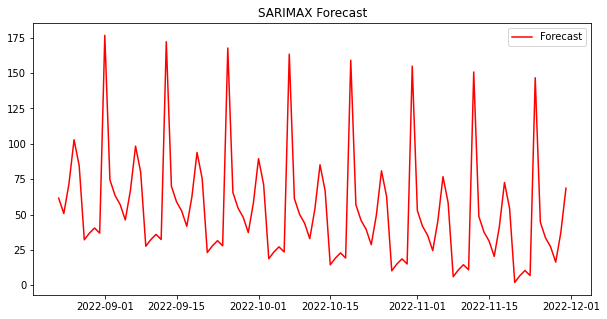

In [30]:
with open('final_sarimax_model.pkl','rb') as f:
    model=pickle.load(f,encoding='utf-8')

forecast = model.get_forecast(steps=100)

forecast_mean = forecast.predicted_mean
print(forecast_mean)
plt.figure(figsize=(10, 5))

plt.plot(forecast_mean, label='Forecast', color='red')

plt.title('SARIMAX Forecast')
plt.legend()
plt.show()